# 건축년도, 전용면적 인코딩

In [129]:
# 패키지 임포트
import numpy as np
import pandas as pd
import scipy.stats as ss
import os 
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install plotly
import plotly.offline as off
import plotly.graph_objs as go
pd.set_option('display.max_columns', 500)

plt.rc("font", family="Malgun Gothic") # matplotlib 한글깨짐 방지

In [150]:
# 거래금액, 전용면적 데이터 컬럼명 변경
train_data=pd.read_csv('train_data.csv', encoding='CP949')
train_data.rename(columns = {'거래금액(만원)':'거래금액', '전용면적(㎡)':'전용면적'}, inplace=True)
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3
...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19


## 인코딩 - 건축년도와 전용면적

### 전용면적
#### 결측지 제거
#### 값 그대로 -> encoding_data['전용면적_값']
##### 로그변환 ->  encoding_data['전용면적_log']
##### 10단위 나눠 인코딩 -> encoding_data['전용면적_10']

(300.0, 400.0)

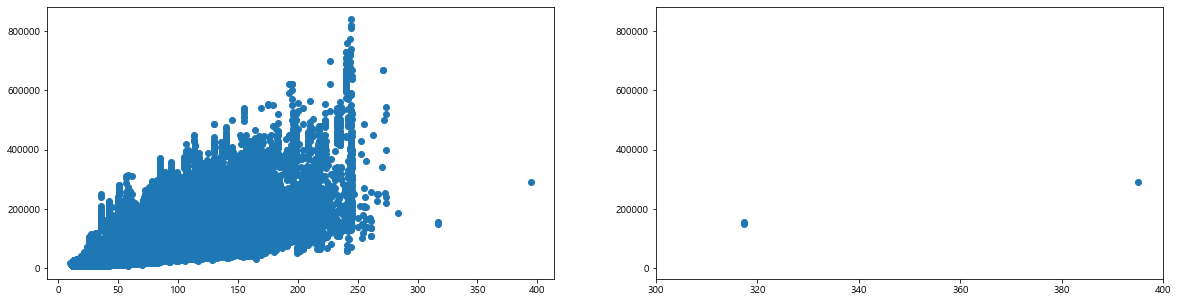

In [151]:
#거래금액 - 전용면적 분포도 확인 (12/26)
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.scatter(train_data['전용면적'],train_data['거래금액'])

plt.subplot(1, 2, 2)
plt.scatter(train_data['전용면적'],train_data['거래금액'])
plt.xlim([300,400])#max=395.06

In [152]:
#결측치 제거하기
train_data.drop(train_data.loc[train_data['전용면적']>300].index, inplace=True)
train_data

,시군구,단지명,전용면적,계약년월,거래금액,층,건축년도,도로명
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,4,1987,언주로 3
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,117000,2,1987,언주로 3
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201801,130000,1,1987,언주로 3
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,201803,139500,2,1987,언주로 3
4,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,54.98,201804,107500,5,1987,언주로 3
...,...,...,...,...,...,...,...,...
240916,서울특별시 중랑구 중화동,한영(104),67.57,202008,26000,2,2003,동일로144길 74
240917,서울특별시 중랑구 중화동,현대휴앤미,95.94,202007,44000,6,2007,봉화산로27가길 23
240918,서울특별시 중랑구 중화동,현대휴앤미,100.17,202012,54800,5,2007,봉화산로27가길 23
240919,서울특별시 중랑구 중화동,현대휴앤미(102동),77.71,202009,40000,5,2007,봉화산로27가길 19


In [153]:
train_data['전용면적'].describe()

count    240918.000000
mean         77.929383
std          30.400276
min          10.020000
25%          59.720000
50%          83.420000
75%          84.970000
max         283.760000
Name: 전용면적, dtype: float64

In [154]:
# 값 그대로
encoding_data=pd.DataFrame(data=train_data['전용면적'])
encoding_data.rename(columns={'전용면적':'전용면적_값'}, inplace=True)
encoding_data

,전용면적_값
0,79.97
1,79.97
2,79.97
3,79.97
4,54.98
...,...
240916,67.57
240917,95.94
240918,100.17
240919,77.71


In [155]:
#로그변환
encoding_data['전용면적_log']=np.log1p(train_data['전용면적'])
encoding_data

,전용면적_값,전용면적_log
0,79.97,4.394079
1,79.97,4.394079
2,79.97,4.394079
3,79.97,4.394079
4,54.98,4.024994
...,...,...
240916,67.57,4.227855
240917,95.94,4.574092
240918,100.17,4.616802
240919,77.71,4.365770


In [156]:
#10단위로 29구간 인코딩 (10~290)
labels=list(range(1,30))
encoding_data['전용면적_10']=pd.cut(train_data['전용면적'],
                                bins=29, labels=labels, include_lowest=True)
encoding_data

,전용면적_값,전용면적_log,전용면적_10
0,79.97,4.394079,8
1,79.97,4.394079,8
2,79.97,4.394079,8
3,79.97,4.394079,8
4,54.98,4.024994,5
...,...,...,...
240916,67.57,4.227855,7
240917,95.94,4.574092,10
240918,100.17,4.616802,10
240919,77.71,4.365770,8


In [157]:
encoding_data['전용면적_10'].value_counts()

8     85856
6     57942
5     15562
12    15111
4     13484
7      9934
3      6125
10     5343
11     5201
1      4700
14     4408
13     4359
2      2429
15     2260
9      2153
17     1696
16     1523
18      693
19      450
20      387
25      323
22      299
21      247
24      215
23      175
26       15
27       14
28       13
29        1
Name: 전용면적_10, dtype: int64

In [158]:
train_data['전용면적'].value_counts().sort_values(ascending=False)

84.9600     4555
84.9800     4417
84.9700     4409
84.9900     4406
59.9900     3005
            ... 
47.6800        1
59.1605        1
55.8400        1
84.9712        1
142.1600       1
Name: 전용면적, Length: 10827, dtype: int64

### 건축년도
#### 현재년도-min(건축년도) -> encoding_data['건축년도_min_차이']
#### 5단위로 13구간 인코딩 -> encoding_data['건축년도_5']

In [159]:
train_data['건축년도'].describe()

count    240918.000000
mean       2000.225629
std           9.666816
min        1961.000000
25%        1994.000000
50%        2001.000000
75%        2007.000000
max        2021.000000
Name: 건축년도, dtype: float64

In [160]:
#건축년도 변수-가장 작은 건축년도 = 값으로 인코딩
# encoding_data['건축년도']=train_data['건축년도'] #drop, 단순 값 확인
encoding_data['건축년도_min_차이']=train_data['건축년도']-train_data['건축년도'].min()
encoding_data

,전용면적_값,전용면적_log,전용면적_10,건축년도_min_차이
0,79.97,4.394079,8,26
1,79.97,4.394079,8,26
2,79.97,4.394079,8,26
3,79.97,4.394079,8,26
4,54.98,4.024994,5,26
...,...,...,...,...
240916,67.57,4.227855,7,42
240917,95.94,4.574092,10,46
240918,100.17,4.616802,10,46
240919,77.71,4.365770,8,46


In [161]:
#거래금액 DESC 정렬, 건축년도 정렬 후 index 초기화...
#반대로 해야됌...
pd.DataFrame(train_data['건축년도'].loc[train_data['거래금액'].sort_values(ascending=False).index].reset_index())

,index,건축년도
0,150059,2011
1,150106,2011
2,73162,2011
3,232567,2011
4,232570,2011
...,...,...
240913,176951,2002
240914,20489,1997
240915,20454,1995
240916,178684,1996


In [169]:
#5단위로 13구간 인코딩 (1961~2021)
#5단위로 12구간 인코딩 (1961~2020)시 60구간이라 더 효과적일수도 있음
labels=list(range(1,14))
encoding_data['건축년도_5']=pd.cut(train_data['건축년도'],
                                bins=13, labels=labels, include_lowest=True)
encoding_data

,전용면적_값,전용면적_log,전용면적_10,건축년도_min_차이,건축년도_5,거래금액
0,79.97,4.394079,8,26,6,130000
1,79.97,4.394079,8,26,6,117000
2,79.97,4.394079,8,26,6,130000
3,79.97,4.394079,8,26,6,139500
4,54.98,4.024994,5,26,6,107500
...,...,...,...,...,...,...
240916,67.57,4.227855,7,42,10,26000
240917,95.94,4.574092,10,46,10,44000
240918,100.17,4.616802,10,46,10,54800
240919,77.71,4.365770,8,46,10,40000


In [170]:
encoding_data['건축년도_5'].value_counts()

9     50359
10    48683
8     26674
7     24206
11    23811
6     23233
12    22451
13     9529
5      6284
4      3878
3      1423
2       367
1        20
Name: 건축년도_5, dtype: int64

In [174]:
#13개의 구간으로 인코딩된 건축년도_cut과
#각 구간별 평균 거래금액 기준으로 rank 부여한 컬럼 생성하여 가중치 컬럼 생성
encoding_data['거래금액']=train_data['거래금액']
mean_data=encoding_data.groupby('건축년도_5').mean()['거래금액']
mean_data

건축년도_5
1      22515.000000
2      42883.754768
3     122088.605762
4     164826.097989
5     130564.042011
6      72105.802651
7      56601.582542
8      60126.268876
9      65884.702397
10     78636.657437
11    101536.662509
12     89301.434769
13     83059.087417
Name: 거래금액, dtype: float64

In [175]:
rank_data=mean_data.rank()
rank_data

건축년도_5
1      1.0
2      2.0
3     11.0
4     13.0
5     12.0
6      6.0
7      3.0
8      4.0
9      5.0
10     7.0
11    10.0
12     9.0
13     8.0
Name: 거래금액, dtype: float64

In [192]:
# for i in range(len(encoding_data)):
#     for j in range(0,13):
#         if encoding_data['건축년도_5'][i]==rank_data[j]:
#             encoding_data['건축년도_5_rank']=rank_data[j]
#         else:
#             continue
rank_encoding_data=encoding_data
for i in range(0,13):
    index=encoding_data['건축년도_5'].loc[encoding_data['건축년도_5']==(i+1)].index
    encoding_data['건축년도_5_rank'].loc[index]=rank_data[i]
# encoding_data[['건축년도_5', '건축년도_5_rank']].loc[encoding_data['건축년도_5']==5] #컬럼별 잘 들어갔는지 확인
encoding_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,전용면적_값,전용면적_log,전용면적_10,건축년도_min_차이,건축년도_5,건축년도_5_rank
0,79.97,4.394079,8,26,6,6.0
1,79.97,4.394079,8,26,6,6.0
2,79.97,4.394079,8,26,6,6.0
3,79.97,4.394079,8,26,6,6.0
4,54.98,4.024994,5,26,6,6.0
...,...,...,...,...,...,...
240916,67.57,4.227855,7,42,10,7.0
240917,95.94,4.574092,10,46,10,7.0
240918,100.17,4.616802,10,46,10,7.0
240919,77.71,4.365770,8,46,10,7.0


In [193]:
# encoding_data.drop('거래금액', axis=1, inplace=True)
encoding_data

,전용면적_값,전용면적_log,전용면적_10,건축년도_min_차이,건축년도_5,건축년도_5_rank
0,79.97,4.394079,8,26,6,6.0
1,79.97,4.394079,8,26,6,6.0
2,79.97,4.394079,8,26,6,6.0
3,79.97,4.394079,8,26,6,6.0
4,54.98,4.024994,5,26,6,6.0
...,...,...,...,...,...,...
240916,67.57,4.227855,7,42,10,7.0
240917,95.94,4.574092,10,46,10,7.0
240918,100.17,4.616802,10,46,10,7.0
240919,77.71,4.365770,8,46,10,7.0
